Q1 (Philip)

In [27]:
from os import name
import requests as r
from bs4 import BeautifulSoup
import pandas as pd
import sqlite3
import yfinance as yf

############## WEB SCRAPING SECTION START #########################

url = 'https://en.wikipedia.org/wiki/List_of_S%26P_500_companies'

page = r.get(url)
soup = BeautifulSoup(page.text, 'html.parser')
table = soup.find('tbody')
td_tags = table.find_all('td')
td_tags_ad = [i.text for i in td_tags]
td_tags_ad = [i.replace('\n', '') for i in td_tags_ad]
td_tags_ad = [i.replace('', '') for i in td_tags_ad]


ticker = [td_tags_ad[i] for i in range(0, len(td_tags_ad), 8)]
name = [td_tags_ad[i+1] for i in range(0, len(td_tags_ad), 8)]
sector = [td_tags_ad[i+2] for i in range(0, len(td_tags_ad), 8)]
sub_industry = [td_tags_ad[i+3] for i in range(0, len(td_tags_ad), 8)]
headquarters = [td_tags_ad[i+4] for i in range(0, len(td_tags_ad), 8)]
date_added = [td_tags_ad[i+5] for i in range(0, len(td_tags_ad), 8)]
cik = [td_tags_ad[i+6] for i in range(0, len(td_tags_ad), 8)]
founded = [td_tags_ad[i+7] for i in range(0, len(td_tags_ad), 8)]

data = {
    'Ticker': ticker[:50],
    'Name': name[:50],
    'Sector': sector[:50],
    'Sub Industry': sub_industry[:50],
    'Headquarters': headquarters[:50],
    'Date Added': date_added[:50],
    'CIK': cik[:50],
    'Founded': founded[:50]
}

df1 = pd.DataFrame(data)
df1.to_csv('S&P500_WebScrape.csv', index=False)

############## WEB SCRAPING SECTION END #########################

In [28]:
############## API SECTION START #########################

fifty_two_week_high = []
fifty_two_week_low = []
open = []
close = []
one_year_percent_change = []

for i in data['Ticker']:
  ticker_info = yf.download(i, period = '1y')
  fifty_two_week_high.append(ticker_info['High'].max())
  fifty_two_week_low.append(ticker_info['Low'].min())
  open.append(ticker_info['Open'].iloc[0])
  close.append(ticker_info['Close'].iloc[-1])
  one_year_percent_change.append(((ticker_info['Close'].iloc[-1] - ticker_info['Open'].iloc[0])/(ticker_info['Open'].iloc[-1]))*100)

api_data = {
    'Ticker': data['Ticker'],
    '52 Week High': [x.iloc[0] if isinstance(x, pd.Series) else x for x in fifty_two_week_high],
    '52 Week Low': [x.iloc[0] if isinstance(x, pd.Series) else x for x in fifty_two_week_low],
    'Year Open': [x.iloc[0] if isinstance(x, pd.Series) else x for x in open],
    'Year Close': [x.iloc[0] if isinstance(x, pd.Series) else x for x in close],
    'Year Percent Change': [x.iloc[0] if isinstance(x, pd.Series) else x for x in one_year_percent_change]
}

df2 = pd.DataFrame(api_data)
df2.to_csv('S&P500_API.csv', index=False)

############## API SECTION END #########################

/tmp/ipython-input-2977963165.py:12: FutureWarning: YF.download() has changed argument auto_adjust default to True
  ticker_info = yf.download(i, period = '1y')
[*********************100%***********************]  1 of 1 completed
/tmp/ipython-input-2977963165.py:12: FutureWarning: YF.download() has changed argument auto_adjust default to True
  ticker_info = yf.download(i, period = '1y')
[*********************100%***********************]  1 of 1 completed
/tmp/ipython-input-2977963165.py:12: FutureWarning: YF.download() has changed argument auto_adjust default to True
  ticker_info = yf.download(i, period = '1y')
[*********************100%***********************]  1 of 1 completed
/tmp/ipython-input-2977963165.py:12: FutureWarning: YF.download() has changed argument auto_adjust default to True
  ticker_info = yf.download(i, period = '1y')
[*********************100%***********************]  1 of 1 completed
/tmp/ipython-input-2977963165.py:12: FutureWarning: YF.download() has changed ar

,Ticker,52 Week High,52 Week Low,Year Open,Year Close,Year Percent Change
0,MMM,164.149994,120.055065,122.112478,153.300003,20.464256
1,AOS,90.286648,58.250585,78.978749,70.830002,-11.556866
2,ABT,139.950593,105.090342,107.219416,134.279999,20.531550
3,ABBV,214.802501,159.416794,184.192620,198.050003,6.960711
4,ACN,394.411823,238.029999,310.485317,239.199997,-29.376625
5,ADBE,587.750000,332.010010,528.020020,341.049988,-55.205514
6,AMD,182.500000,76.480003,134.690002,172.759995,21.874278
7,AES,19.165336,9.275737,15.634382,13.120000,-19.551963
8,AFL,114.157518,96.666237,99.011757,103.519997,4.395281
9,A,153.191236,96.227351,135.795349,114.620003,-18.524492


In [29]:
############## DF3 AND SQL DB SECTION START #########################

df3 = pd.merge(df1, df2, on='Ticker')
df3.to_csv('S&P500_Merge.csv', index=False)

conn = sqlite3.connect(':memory:')
cursor = conn.cursor()
cursor.execute('''
    CREATE TABLE df3_table (
        id INTEGER PRIMARY KEY AUTOINCREMENT,
        Ticker TEXT,
        Name TEXT,
        Sector TEXT,
        Sub Industry TEXT,
        Headquarters TEXT,
        Date Added TEXT,
        CIK TEXT,
        Founded TEXT
        High REAL,
        Low REAL,
        Open REAL,
        Close REAL,
        Percent Change REAL
    )
''')

conn.commit()
df3.to_sql('df3_table', conn, if_exists='replace', index=False)
pd.read_sql_query('SELECT * FROM df3_table', conn)

############## DF3 AND SQL DB SECTION END #########################

,Ticker,Name,Sector,Sub Industry,Headquarters,Date Added,CIK,Founded,52 Week High,52 Week Low,Year Open,Year Close,Year Percent Change
0,MMM,3M,Industrials,Industrial Conglomerates,"Saint Paul, Minnesota",1957-03-04,0000066740,1902,164.149994,120.055065,122.112478,153.300003,20.464256
1,AOS,A. O. Smith,Industrials,Building Products,"Milwaukee, Wisconsin",2017-07-26,0000091142,1916,90.286648,58.250585,78.978749,70.830002,-11.556866
2,ABT,Abbott Laboratories,Health Care,Health Care Equipment,"North Chicago, Illinois",1957-03-04,0000001800,1888,139.950593,105.090342,107.219416,134.279999,20.531550
3,ABBV,AbbVie,Health Care,Biotechnology,"North Chicago, Illinois",2012-12-31,0001551152,2013 (1888),214.802501,159.416794,184.192620,198.050003,6.960711
4,ACN,Accenture,Information Technology,IT Consulting & Other Services,"Dublin, Ireland",2011-07-06,0001467373,1989,394.411823,238.029999,310.485317,239.199997,-29.376625
5,ADBE,Adobe Inc.,Information Technology,Application Software,"San Jose, California",1997-05-05,0000796343,1982,587.750000,332.010010,528.020020,341.049988,-55.205514
6,AMD,Advanced Micro Devices,Information Technology,Semiconductors,"Santa Clara, California",2017-03-20,0000002488,1969,182.500000,76.480003,134.690002,172.759995,21.874278
7,AES,AES Corporation,Utilities,Independent Power Producers & Energy Traders,"Arlington, Virginia",1998-10-02,0000874761,1981,19.165336,9.275737,15.634382,13.120000,-19.551963
8,AFL,Aflac,Financials,Life & Health Insurance,"Columbus, Georgia",1999-05-28,0000004977,1955,114.157518,96.666237,99.011757,103.519997,4.395281
9,A,Agilent Technologies,Health Care,Life Sciences Tools & Services,"Santa Clara, California",2000-06-05,0001090872,1999,153.191236,96.227351,135.795349,114.620003,-18.524492


Q2 (Kelvin)

Overall process flow
1. Import required libraries
2. Set empty names and heights lists
3. Set url lists to separate variables
4. Define scrape functions
5. Map one url list variable to names and heights scrape functions
6. Scraped data is appended to empty names and heights lists and in turn saved to new list
7. Original names and heights lists are cleared
8. Repeat steps 5 to 7 for remaining url lists variables
9. Dataframe for respective sets of lists are created
10. Print codes for assignment item #5 and #6 are at the end

In [ ]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import warnings

# Suppress all warnings
warnings.filterwarnings('ignore')

headers = {
    'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/138.0.0.0 Safari/537.36',
    'Accept': 'image/avif,image/webp,image/apng,image/svg+xml,image/*,*/*;q=0.8',
    'Accept-language' : 'en-US,en;q=0.9',
    'Connection' : 'keep-alive'
    }

names_list = []
heights_list = []

In [ ]:
# Mens' Volleyball Roster URLs
mv_url_list = ['https://ccnyathletics.com/sports/mens-volleyball/roster/2023?view=2','https://lehmanathletics.com/sports/mens-volleyball/roster/2023?view=2','https://www.brooklyncollegeathletics.com/sports/mens-volleyball/roster/2023?view=2',
       'https://johnjayathletics.com/sports/mens-volleyball/roster/2023?view=2','https://athletics.baruch.cuny.edu/sports/mens-volleyball/roster/2023?view=2','https://mecathletics.com/sports/mens-volleyball/roster/2023?view=2',
       'https://www.huntercollegeathletics.com/sports/mens-volleyball/roster/2023?view=2','https://yorkathletics.com/sports/mens-volleyball/roster/2023?view=2','https://ballstatesports.com/sports/mens-volleyball/roster/2023?view=2']

# Women's Volleyball Roster URLs
wv_url_list = ['https://bmccathletics.com/sports/womens-volleyball/roster/2022?view=2','https://yorkathletics.com/sports/womens-volleyball/roster/2023?view=2','https://hostosathletics.com/sports/womens-volleyball/roster/2022-2023?view=2',
               'https://bronxbroncos.com/sports/womens-volleyball/roster/2023?view=2','https://queensknights.com/sports/womens-volleyball/roster/2023?view=2','https://augustajags.com/sports/wvball/roster/2023?view=2',
               'https://flaglerathletics.com/sports/womens-volleyball/roster/2023?view=2','https://pacersports.com/sports/womens-volleyball/roster/2023?view=2','https://www.golhu.com/sports/womens-volleyball/roster/2023?view=2']

# Mens' Swimming Roster URLs
ms_url_list = ['https://csidolphins.com/sports/mens-swimming-and-diving/roster/2023-2024?view=2','https://yorkathletics.com/sports/mens-swimming-and-diving/roster/2023-24','https://athletics.baruch.cuny.edu/sports/mens-swimming-and-diving/roster/2023-24?view=2',
               'https://www.brooklyncollegeathletics.com/sports/mens-swimming-and-diving/roster/2022-23?view=2','https://lindenwoodlions.com/sports/mens-swimming-and-diving/roster/2021-22?view=2','https://mckbearcats.com/sports/mens-swimming-and-diving/roster/2023-24?view=2',
               'https://ramapoathletics.com/sports/mens-swimming-and-diving/roster?view=2','https://oneontaathletics.com/sports/mens-swimming-and-diving/roster?view=2','https://binghamtonbearcats.com/sports/mens-swimming-and-diving/roster/2021-22?view=2',
               'https://albrightathletics.com/sports/mens-swimming-and-diving/roster/2021-22?view=2']

# Women's Swimming Roster URLs
ws_url_list = ['https://csidolphins.com/sports/womens-swimming-and-diving/roster/2023-2024?view=2','https://queensknights.com/sports/womens-swimming-and-diving/roster/2019-20','https://yorkathletics.com/sports/womens-swimming-and-diving/roster/2021-22',
               'https://athletics.baruch.cuny.edu/sports/womens-swimming-and-diving/roster/2021-22?view=2','https://www.brooklyncollegeathletics.com/sports/womens-swimming-and-diving/roster/2022-23?view=2',
               'https://lindenwoodlions.com/sports/womens-swimming-and-diving/roster/2021-22?view=2','https://mckbearcats.com/sports/womens-swimming-and-diving/roster?view=2','https://ramapoathletics.com/sports/womens-swimming-and-diving/roster?view=2',
               'https://keanathletics.com/sports/womens-swimming-and-diving/roster?view=2','https://oneontaathletics.com/sports/womens-swimming-and-diving/roster/2021-22?view=2']

In [ ]:
# Function to scrape names and append it to names list.
def scrape_name(var):
  url = var
  page = requests.get(url, headers= headers, verify = False)
  soup = BeautifulSoup(page.content,'html.parser')
  td_names = soup.find_all('td', class_ = 'sidearm-table-player-name')
  for names in td_names:
    names_list.append(names.get_text())

In [ ]:
# Function to scrape heights, convert it to inches and append it to a heights list.
def scrape_heights(var):
  url = var
  page = requests.get(url, headers= headers, verify = False)
  soup = BeautifulSoup(page.content,'html.parser')
  td_heights = soup.find_all('td', class_ = 'height')
  for heights in td_heights:
    raw_height=heights.get_text().split('-')
    feet= float(raw_height[0])
    inches=float(raw_height[1])
    full_height=(feet*12)+inches
    heights_list.append(full_height)


In [ ]:
# Map functions and Mens' Volleyball Roster URLs
# Creates new lists for Men's Volleyball names and heights
list(map(scrape_name, mv_url_list))
mv_names = [item.strip() for item in names_list]
names_list.clear()
list(map(scrape_heights,mv_url_list))
mv_heights = heights_list.copy()
heights_list.clear()

In [ ]:
# Map functions and Women's Volleyball Roster URLs
list(map(scrape_name, wv_url_list))
wv_names = [item.strip() for item in names_list]
names_list.clear()
list(map(scrape_heights,wv_url_list))
wv_heights = heights_list.copy()
heights_list.clear()

In [ ]:
# Map functions and Mens' Swimming Roster URLs
list(map(scrape_name, ms_url_list))
ms_names = [item.strip() for item in names_list]
names_list.clear()
list(map(scrape_heights,ms_url_list))
ms_heights = heights_list.copy()
heights_list.clear()

In [ ]:
# Map functions and Women's Swimming Roster URLs
list(map(scrape_name, ws_url_list))
ws_names = [item.strip() for item in names_list]
names_list.clear()
list(map(scrape_heights,ws_url_list))
ws_heights = heights_list.copy()
heights_list.clear()

In [ ]:
# Create Mens' Volleyball dictionary and then convert to data frame
mv_names_heights = {
    'Name': mv_names,
    'Heights':mv_heights
    }
mv_names_heights_df = pd.DataFrame(mv_names_heights)
mv_names_heights_df.to_csv("Mens' Volleyball Names and Heights.csv")


In [ ]:
# Create Women's Volleyball dictionary and then convert to data frame
wv_names_heights = {
    'Name': wv_names,
    'Heights':wv_heights
    }
wv_names_heights_df = pd.DataFrame(wv_names_heights)
wv_names_heights_df.to_csv("Women's Volleyball Names and Heights.csv")

In [ ]:
# Create Mens' Swimming dictionary and then convert to data frame
ms_names_heights = {
    'Name': ms_names,
    'Heights':ms_heights
    }
ms_names_heights_df = pd.DataFrame(ms_names_heights)
ms_names_heights_df.to_csv("Mens' Swimming Names and Heights.csv")

In [ ]:
# Create Women's Swimming dictionary and then convert to data frame
ws_names_heights = {
    'Name': ws_names,
    'Heights':ws_heights
    }
ws_names_heights_df = pd.DataFrame(ws_names_heights)
ws_names_heights_df.to_csv("Women's Swimming Names and Heights.csv")

In [ ]:
# For instructions number 5
# Prints a message for the average heights for each of the four dataframes

mens_volleyball_average_height = mv_names_heights_df['Heights'].mean()
print(f"Mens' volleyball team average height is: {mens_volleyball_average_height:.2f} inches.")
womens_volleyball_average_height = wv_names_heights_df['Heights'].mean()
print(f"Women's volleyball team average height is: {womens_volleyball_average_height:.2f} inches.")
mens_swim_average_height = ms_names_heights_df['Heights'].mean()
print(f"Mens' swim team average height is: {mens_swim_average_height:.2f} inches.")
womens_swim_average_height = ws_names_heights_df['Heights'].mean()
print(f"Women's swim team average height is: {womens_swim_average_height:.2f} inches.")

Mens' volleyball team average height is: 71.32 inches.
Women's volleyball team average height is: 67.74 inches.
Mens' swim team average height is: 71.32 inches.
Women's swim team average height is: 65.69 inches.


In [ ]:
# For instructions number 6
# Finds and prints the 5 tallest and 5 shortest for each of the four dataframs

sorted_mv_df = mv_names_heights_df.sort_values(by='Heights', ascending=False)
print("Mens' Volleyball Tallest")
print(sorted_mv_df.head())
print()
print("Mens' Volleyball Shortest")
print(sorted_mv_df.tail())
print()

sorted_wv_df = wv_names_heights_df.sort_values(by='Heights', ascending=False)
print("Women's Volleyball Tallest")
print(sorted_wv_df.head())
print()
print("Women's Volleyball Shortest")
print(sorted_wv_df.tail())
print()

sorted_ms_df = ms_names_heights_df.sort_values(by='Heights', ascending=False)
print("Mens' Swimming Tallest")
print(sorted_ms_df.head())
print()
print("Mens' Swimming Shortest")
print(sorted_ms_df.tail())
print()

sorted_ws_df = ws_names_heights_df.sort_values(by='Heights', ascending=False)
print("Women's Swimming Tallest")
print(sorted_ws_df.head())
print()
print("Women's Swimming Shortest")
print(sorted_ws_df.tail())

Mens' Volleyball Tallest
                     Name  Heights
48  Kyle Barriffe-Johnson     79.0
67            Akil Vaughn     79.0
85            Jimmy Chang     78.0
89     Matisse Lee-Maarek     78.0
62              Haoxin Hu     77.0

Mens' Volleyball Shortest
                    Name  Heights
22              Wai  Lin     65.0
65        Jonathan  Liao     65.0
34         Bryce Glasper     64.0
16           Chris  Mata     63.0
0   Angel Gabriel Chabla     63.0

Women's Volleyball Tallest
                Name  Heights
69     Kayli Cleaver     76.0
85        Molly Boyd     75.0
66    Sophia Kruczko     75.0
64   Savannah  Davis     75.0
122     Alyssa Daley     75.0

Women's Volleyball Shortest
                     Name  Heights
8            Megan Rivera     62.0
113  Salma Villa  Morales     62.0
18          Jasmine  Vega     61.0
4         Garyana Altidor     61.0
109      Izabella De Lima     61.0

Mens' Swimming Tallest
              Name  Heights
114    Tyson Upton     79.0
91   Co

In [ ]:
# Get the average heights for all teams

mv_avg = mv_names_heights_df['Heights'].mean()
wv_avg = wv_names_heights_df['Heights'].mean()
ms_avg = ms_names_heights_df['Heights'].mean()
ws_avg = ws_names_heights_df['Heights'].mean()

print(f'Mens Volleyball Average Height: {round(mv_avg, 2)}')
print(f'Womens Volleyball Average Height: {round(wv_avg, 2)}')
print(f'Mens Swimming Average Height: {round(ms_avg, 2)}')
print(f'Womens Swimming Average Height: {round(ws_avg, 2)}')


Mens Volleyball Average Height: 71.32
Womens Volleyball Average Height: 67.74
Mens Swimming Average Height: 71.32
Womens Swimming Average Height: 65.69


In [ ]:
# Create dictionary
avg_heights = {
    'Sports Team' : ['Mens Volleyball', 'Womens Volleyball', 'Mens Swimming', 'Womens Swimming'],
    'Average Height' : [71.32, 67.74, 71.32, 65.69]
}

df_avg_heights = pd.DataFrame(avg_heights)

(60.0, 74.0)

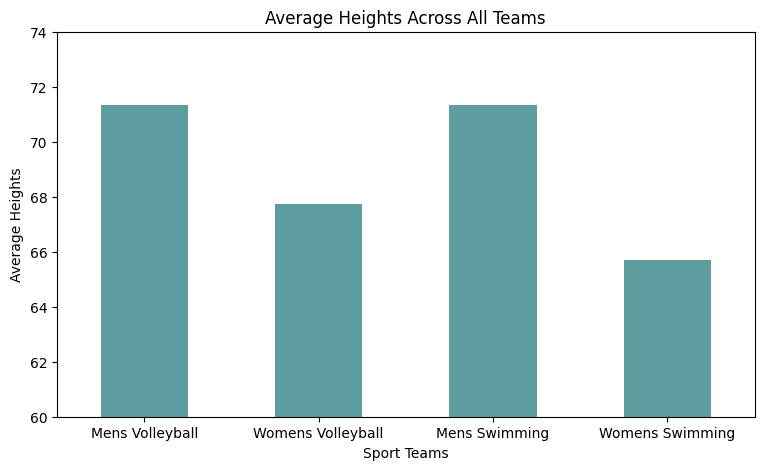

In [ ]:
# Create bar plot

height_plot = df_avg_heights.plot(kind='bar', x = 'Sports Team', y = 'Average Height', ylabel = 'Average Heights', xlabel = 'Sport Teams', rot = 0, title = 'Average Heights Across All Teams', legend=False, figsize=(9, 5), color = 'cadetblue')

height_plot.set_ylim(60, 74)